In [2]:
# import folium
import geopandas as gpd
from sentinelsat.sentinel import SentinelAPI
import rasterio 
import matplotlib.pyplot as plt
from rasterio import plot
from rasterio.plot import show
from rasterio.mask import mask
# from osgeo import gdal
import numpy
import matplotlib.pyplot as plt


In [29]:
# api = SentinelAPI('bono129 ', 'DSPproject2022', 'https://scihub.copernicus.eu/dhus/')
api = SentinelAPI('meet.saparia','9909404659', 'https://scihub.copernicus.eu/dhus/')

# https://apihub.copernicus.eu/apihub

# search by polygon, time, and SciHub query keywords
products = api.query("POLYGON ((6.123332220377563 53.00950842565965, 6.127974152216865 53.01040216650364, 6.132616084056167 53.012971568339225, 6.136143952255196 53.014423771276654, 6.127231443122469 53.02335932907451, 6.113119970330359 53.016211030882545, 6.123332220377563 53.00950842565965))",
                     date=('20221020', '20221121'), #year, month, day
                     platformname='Sentinel-2',
                     cloudcoverpercentage=(0, 20))

products_df = api.to_dataframe(products)



In [30]:
# # download all results from the search
products_df = api.to_geodataframe(products)
products_df
# gdf_sorted = gdf.sort_values(['cloudcoverpercentage'], ascending=[True])
# gdf_sorted

,title,link,link_alternative,link_icon,summary,ondemand,generationdate,beginposition,endposition,ingestiondate,...,processinglevel,datastripidentifier,granuleidentifier,identifier,uuid,datatakesensingstart,sensoroperationalmode,tileid,hv_order_tileid,geometry
f1bbde21-396e-4a31-967f-0f105f8db0b9,S2A_MSIL2A_20221116T105321_N0400_R051_T31UFU_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-11-16T10:53:21.024Z, Instrument: MS...",false,2022-11-16 17:09:58,2022-11-16 10:53:21.024,2022-11-16 10:53:21.024,2022-11-16 18:48:55.279,...,Level-2A,S2A_OPER_MSI_L2A_DS_ATOS_20221116T170958_S2022...,S2A_OPER_MSI_L2A_TL_ATOS_20221116T170958_A0386...,S2A_MSIL2A_20221116T105321_N0400_R051_T31UFU_2...,f1bbde21-396e-4a31-967f-0f105f8db0b9,NaT,NaN,NaN,NaN,"MULTIPOLYGON (((6.07168 52.22257, 6.14177 53.2..."
15d6cb78-0c4e-4ca4-a00c-6ecbd6f979d1,S2A_MSIL1C_20221116T105321_N0400_R051_T31UFU_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-11-16T10:53:21.024Z, Instrument: MS...",false,2022-11-16 14:32:15,2022-11-16 10:53:21.024,2022-11-16 10:53:21.024,2022-11-16 17:34:38.645,...,Level-1C,S2A_OPER_MSI_L1C_DS_ATOS_20221116T143215_S2022...,S2A_OPER_MSI_L1C_TL_ATOS_20221116T143215_A0386...,S2A_MSIL1C_20221116T105321_N0400_R051_T31UFU_2...,15d6cb78-0c4e-4ca4-a00c-6ecbd6f979d1,2022-11-16 10:53:21.024,INS-NOBS,31UFU,UU31F,"MULTIPOLYGON (((6.07168 52.22257, 6.14177 53.2..."


In [32]:
api.download('f1bbde21-396e-4a31-967f-0f105f8db0b9')

MD5 checksumming:   0%|          | 0.00/1.13G [00:00<?, ?B/s]

{'id': 'f1bbde21-396e-4a31-967f-0f105f8db0b9',
 'title': 'S2A_MSIL2A_20221116T105321_N0400_R051_T31UFU_20221116T170958',
 'size': 1131834004,
 'md5': '76c915eefda1cfec3626abddc6b090c3',
 'date': datetime.datetime(2022, 11, 16, 10, 53, 21, 24000),
 'footprint': 'POLYGON((4.498460428340929 53.24020834947074,6.141769904481162 53.20820137275637,6.071678487044593 52.22256603361336,4.464980367164797 52.25345680664421,4.498460428340929 53.24020834947074))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('f1bbde21-396e-4a31-967f-0f105f8db0b9')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2022, 11, 16, 18, 49, 15, 965000),
 'Ingestion Date': datetime.datetime(2022, 11, 16, 18, 48, 55, 279000),
 'quicklook_url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('f1bbde21-396e-4a31-967f-0f105f8db0b9')/Products('Quicklook')/$value",
 'path': 'S2A_MSIL2A_20221116T105321_N0400_R051_T31UFU_20221116T170958.zip',
 'downloaded_bytes': 1131834004}

In [3]:
# create image.tiff
bands = r'S2A_MSIL2A_20221116T105321_N0400_R051_T31UFU_20221116T170958.SAFE/GRANULE/L2A_T31UFU_A038658_20221116T105603/IMG_DATA/R10m'
blue = rasterio.open(bands+'/T31UFU_20221116T105321_B02_10m.jp2') 
green = rasterio.open(bands+'/T31UFU_20221116T105321_B03_10m.jp2') 
red = rasterio.open(bands+'/T31UFU_20221116T105321_B04_10m.jp2')
infra_red = rasterio.open(bands+'/T31UFU_20221116T105321_B08_10m.jp2')
with rasterio.open('image_name.tiff','w',driver='Gtiff', width=blue.width, height=blue.height, count=4, crs=blue.crs,transform=blue.transform, dtype=blue.dtypes[0]) as rgb:
    rgb.write(blue.read(1),3) 
    rgb.write(green.read(1),2) 
    rgb.write(red.read(1),1)
    rgb.write(infra_red.read(1),4)
    rgb.close()
    

In [4]:
### Extracting the data from the red and near-infrared bands
filename = 'image_name.tiff'
with rasterio.open(filename) as src:
    band_red = src.read(1)
with rasterio.open(filename) as src:
    band_nir = src.read(4)

In [5]:
# Do not display error when divided by zero 
numpy.seterr(divide='ignore', invalid='ignore')

# NDVI 
ndvi = (band_nir.astype(float) - band_red.astype(float)) / (band_nir + band_red)


In [6]:
print(ndvi)

[[-0.02187785 -0.01308074 -0.02002795 ...  0.50449509  0.50904178
   0.50020585]
 [-0.02655678 -0.01272727 -0.02594995 ...  0.50559934  0.51103776
   0.48783505]
 [-0.03574702 -0.02957486 -0.02482436 ...  0.50740132  0.50104297
   0.49188745]
 ...
 [ 0.03545301  0.04634085  0.02791762 ...  0.35104813  0.32565191
   0.28971375]
 [ 0.04641582  0.03488996  0.01771654 ...  0.34601665  0.32119004
   0.28197032]
 [ 0.0077821   0.03261415  0.0452719  ...  0.35444151  0.31756142
   0.2963076 ]]


In [7]:
print(numpy.nanmin(ndvi)) 
print(numpy.nanmax(ndvi))

-1.0
1.0


In [8]:
# saving ndvi index
# get the metadata of original GeoTIFF:
meta = src.meta
print(meta)

# get the dtype of our NDVI array:
ndvi_dtype = ndvi.dtype
print(ndvi_dtype)

# set the source metadata as kwargs we'll use to write the new data:
kwargs = meta

# update the 'dtype' value to match our NDVI array's dtype:
kwargs.update(dtype=ndvi_dtype)

# update the 'count' value since our output will no longer be a 4-band image:
kwargs.update(count=1)

# Finally, use rasterio to write new raster file 'data/ndvi.tif':
with rasterio.open('ndvi.tif', 'w', **kwargs) as dst:
        dst.write(ndvi, 1)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 4, 'crs': CRS.from_epsg(32631), 'transform': Affine(10.0, 0.0, 600000.0,
       0.0, -10.0, 5900040.0)}
float64


In [9]:
# Applying a color scheme to visualize the NDVI values on the new image
from matplotlib import colors


class MidpointNormalize(colors.Normalize):
   
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
       
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return numpy.ma.masked_array(numpy.interp(value, x, y), numpy.isnan(value))

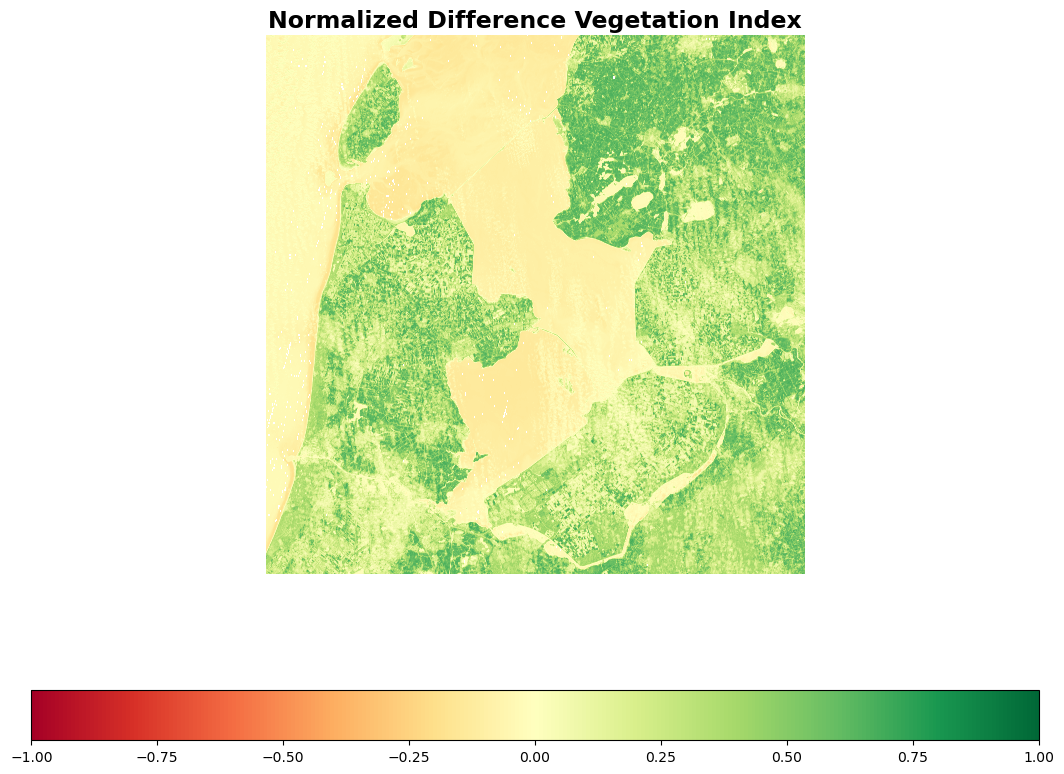

In [21]:
# Interpretation of NDVI
# Set min/max values from NDVI range for image

min_=numpy.nanmin(ndvi)
max_=numpy.nanmax(ndvi)

# Set our custom midpoint for most effective NDVI analysis
mid=0.1


# Setting color scheme ref:https://matplotlib.org/users/colormaps.html as a reference
colormap = plt.cm.RdYlGn 
norm_ = MidpointNormalize(vmin=min, vmax=max, midpoint=mid)
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)

# Use 'imshow' to specify the input data, colormap, min, max, and norm for the colorbar
cbar_plot = ax.imshow(ndvi, cmap = colormap)
# vmin = min_, vmax = max_, norm = norm_

# imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, 
#        vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, 
#        resample=None, url=None, data=None, **kwargs)[source]


# Turn off the display of axis labels 
ax.axis('off')

# Set a title 
ax.set_title('Normalized Difference Vegetation Index', fontsize=17, fontweight='bold')

# Configure the colorbar
cbar = fig.colorbar(cbar_plot, orientation='horizontal', shrink=0.65)

# Call 'savefig' to save this plot to an image file
fig.savefig("ndvi-image.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

# let's visualize
plt.show()